In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/check_aug28.csv')

In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
31748,43,33,47,112,93,112,153,134,152,164,...,133,113,139,99,77,106,47,29,50,6
31749,86,118,214,78,115,213,89,124,222,81,...,101,110,228,94,102,221,87,98,216,3
31750,109,109,179,117,116,184,134,125,188,149,...,140,126,184,142,128,186,134,122,182,0
31751,145,88,208,143,86,205,144,81,206,133,...,121,69,188,148,98,206,125,74,188,3
31752,143,128,189,144,121,194,155,136,198,125,...,144,143,160,171,161,177,169,157,175,1


## The number of images in each class is highly skewed. To avoid class imbalance image augmentation is employeed. New images are generated and stored in the folder.

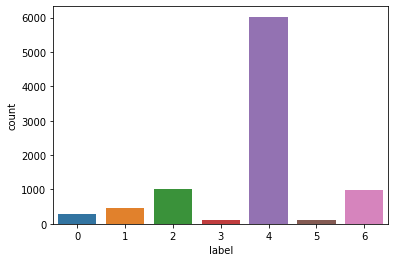

In [ ]:
import seaborn as sns

sns.countplot(df['label'])


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import os
import cv2
import pandas as pd
import numpy as np

#['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc','benign']
for folder_name in ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']:
    arr1=[]
    for image in os.listdir("D:\\TE MINI\\TRAINING\\content\\all_images\\train_dir\\"+folder_name):
    #print(image)
        img_array=cv2.imread('D:\\TE MINI\\TRAINING\\content\\all_images\\train_dir\\'+folder_name+'/'+image)
        #print(img_array.shape)
        new_arr=cv2.resize(img_array,(28,28))
        #print(new_arr.shape)

    #     new_arr=cv2.resize(img_array,(32,32))
        arr1.append(new_arr)

    print(folder_name)

    arr=np.array(arr1)
    print(arr.shape)
    arr = arr.reshape(len(os.listdir('D:\\TE MINI\\TRAINING\\content\\all_images\\train_dir\\'+folder_name)),2352)

    # convert array into dataframe
    DF = pd.DataFrame(arr)

    # save the dataframe as a csv file
    DF.to_csv("D:/TE MINI/TRAINING/2000_AUG/check_aug28/"+folder_name+".csv")
    print(folder_name+' done')


42189
42189


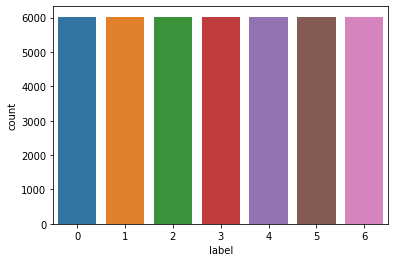

In [ ]:
sns.countplot(df['label'])


In [ ]:

classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),

    1:('bcc' , 'basal cell carcinoma'),

    2:('bkl', 'benign keratosis-like lesions'),

    3:('df', 'dermatofibroma'),

    4:('nv', ' melanocytic nevi'),

    5:('vasc', ' pyogenic granulomas and hemorrhage'),

    6:('mel', 'melanoma'),
}

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


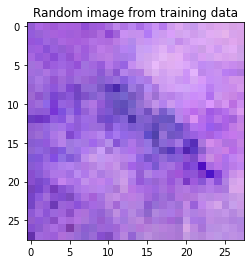

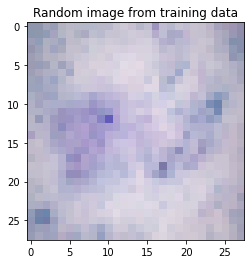

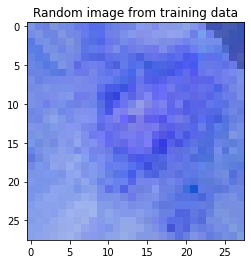

In [ ]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [ ]:
y_train.shape

(42231,)

In [ ]:
y_test.shape

(1002,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [ ]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                          

In [ ]:
len(model.layers)

22

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/best_model4.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [ ]:
%time

optimizer=tf.keras.optimizers.Adam(lr=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [ ]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 10,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/10
402/402 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9991

402/402 [==============================] - 49s 118ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 1.5346 - val_accuracy: 0.7530
Epoch 2/10
402/402 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9991

402/402 [==============================] - 45s 112ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 1.5341 - val_accuracy: 0.7516
Epoch 3/10
402/402 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9992

402/402 [==============================] - 45s 112ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 1.5375 - val_accuracy: 0.7540
Epoch 4/10
402/402 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9991

402/402 [==============================] - 47s 117ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 1.5397 - val_accuracy: 0.7530
Epoch 5/10
402/402 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9990

402/402 [==============================] - 45s 113ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 1.5432 - val_accuracy: 0.7526
Epoch 6/10
402/402 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9993

402/402 [==============================] - 45s 113ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 1.5456 - val_accuracy: 0.7554
Epoch 7/10
402/402 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9993

402/402 [==============================] - 46s 114ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 1.5467 - val_accuracy: 0.7554
Epoch 8/10
402/402 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9992

402/402 [==============================] - 47s 118ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 1.5423 - val_accuracy: 0.7544
Epoch 9/10
402/402 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9992

402/402 [==============================] - 45s 113ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 1.5498 - val_accuracy: 0.7575
Epoch 10/10
402/402 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9992

402/402 [==============================] - 45s 113ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 1.5427 - val_accuracy: 0.7558
Duration: 0:08:24.234641


In [ ]:
model.save('/content/drive/MyDrive/final_model_to_use.h5')



In [ ]:

from keras.models import load_model
m = load_model('/content/drive/MyDrive/final_model.h5')

In [ ]:

x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)
#y_test = np.array(y_test, dtype=np.uint8).reshape(-1,28,28,3)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
Pred = model.predict(x_test, batch_size=64)
Pred_Label = np.argmax(Pred, axis=1)
y_prob = Pred
ytrain = np.argmax(y_train, axis=-1)
test_acc = accuracy_score(y_test, Pred_Label)
ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0, 1, 2, 3, 4,5 ,6])
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1, 2, 3, 4, 5, 6], target_names=targetnames)

50/50 [==============================] - 2s 41ms/step


(3176,)
ROC AUC score: 0.8652770905495243


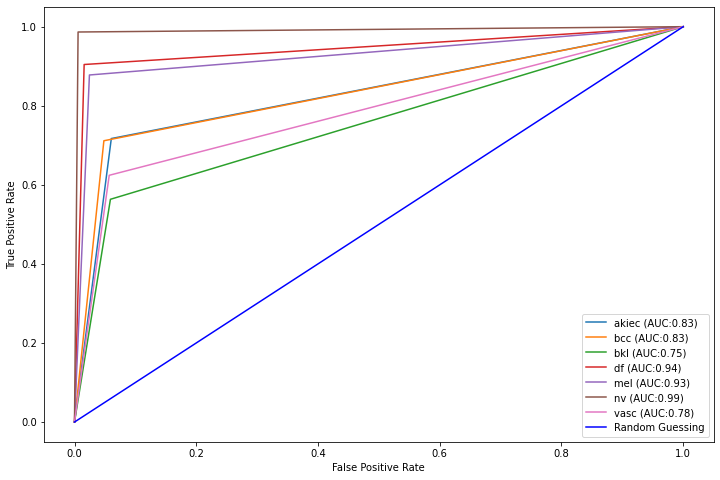

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    print(y_test.shape)
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)



print('ROC AUC score:', multiclass_roc_auc_score(y_test, Pred_Label))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


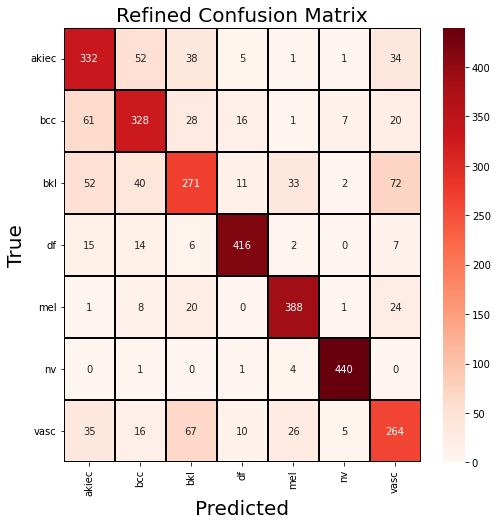

In [ ]:
import seaborn as sns
cm = ConfusionM
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
print(class_report)

              precision    recall  f1-score   support

       akiec       0.67      0.72      0.69       463
         bcc       0.71      0.71      0.71       461
         bkl       0.63      0.56      0.59       481
          df       0.91      0.90      0.91       460
         mel       0.85      0.88      0.87       442
          nv       0.96      0.99      0.98       446
        vasc       0.63      0.62      0.63       423

    accuracy                           0.77      3176
   macro avg       0.77      0.77      0.77      3176
weighted avg       0.77      0.77      0.77      3176



In [ ]:
print("Precision: "+ str(precision_score(y_test, Pred_Label, average='weighted')))
print("Recall: "+ str(recall_score(y_test, Pred_Label, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_test, Pred_Label)))
print("weighted Roc score: " + str(roc_auc_score(y_test, y_prob,multi_class='ovr',average='weighted')))

Precision: 0.7657141002667291
Recall: 0.7679471032745592
Accuracy: 0.7679471032745592
weighted Roc score: 0.948173362733429


In [ ]:
print("Precision: "+ str(precision_score(y_test, Pred_Label, average='weighted')))
print("Recall: "+ str(recall_score(y_test, Pred_Label, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_test, Pred_Label)))
print("weighted Roc score: " + str(roc_auc_score(y_test, y_prob,multi_class='ovr',average='macro')))

Precision: 0.7657141002667291
Recall: 0.7679471032745592
Accuracy: 0.7679471032745592
weighted Roc score: 0.948537216456349
